# Projeto Final | Sistema para Edição de imagens e áudios

<div style="background-color: #f2f2f2; text-align: center; padding: 10px;">
  <h3>Script para Análise dos arquivos de log</h3>
</div>

%------------------------------------------------------------------------------------------------------%<br>
<br>
``Autores:`` Andrea Elias, Anthony Heimlich, Éverton Donato, Julia Midori e Luana Kruger  <br>
<br>
``Instituição:`` ADA Tech<br>
<br>
``Projeto:`` Santander Coders 2023.2<br>
<br>
``Descrição:`` Este código implementa funções para analisar informações contidas nos arquivos de log<br>
<br>
``Repositório GitHub:`` https://github.com/luana-kruger/TP-I_Santander_Coders23  <br>
<br>

%------------------------------------------------------------------------------------------------------%

## Carregar bibliotecas

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

## Carregar Funções

### Carregar arquivo de log

In [98]:
def carregar_arquivo_log(path):
    return pd.read_csv(path)

### Tempo de processamento médio por tipo (imagem ou áudio)

In [7]:
def tempo_processamento_medio_por_tipo(df):
    return df.groupby('Tipo de Processamento')['Tempo de Processamento'].mean()

### Distribuição do tempo de processamento

In [60]:
def distribuicao_tempo_processamento(df):
    col = 'Tempo de Processamento'
    bins=20
    weight = np.ones(len(df[col])) /len(df[col])

    plt.hist(df[col], bins=bins, weights=weight, edgecolor='black')
    
    plt.gca().set_yticklabels(['{:.1f}%'.format(x*100).replace('.', ',') for x in plt.gca().get_yticks()])
    
    plt.xlabel('Tempo de Processamento (ms)')
    plt.ylabel('Frequência (%)')
    plt.title('Distribuição do Tempo de Processamento')
    plt.show()

### Arquivos com tempo de processamento abaixo da média

In [15]:
def arquivos_abaixo_da_media(df):
    media = df['Tempo de Processamento'].mean()
    return df[df['Tempo de Processamento'] < media]

### Análise de correlação

In [21]:
def analise_correlacao(df):
    return df[['Tamanho do Arquivo', 'Tempo de Processamento']].corr()

### Análise de frequência por tipo de processamento

In [22]:
def analise_frequencia_tipo_processamento(df):
    return df['Tipo de Processamento'].value_counts()

### Análise do resultado por tipo de processamento

In [202]:
def analise_resultado_por_tipo(df):
    return df.groupby('Tipo de Processamento')['Resultado do Processamento'].value_counts()

### Análise de erro por tipo de processamento

In [221]:
def analise_erro_por_tipo(df):
    col = 'Tipo de Processamento'
    col2 = 'Resultado do Processamento'
    bar_width = 0.35

    casos_erro = df[df[col2] == "Erro"]

    index = np.arange(len(pd.unique(casos_erro[col])))

    color = ['tab:red']

    fig, ax = plt.subplots()

    erro = ax.bar(index, casos_erro[col].value_counts(), bar_width,color=color, edgecolor='black')

    ax.set_xlabel(col)
    ax.set_ylabel('Qtd de erros')
    ax.set_title('Erros por tipo de processamento')
    ax.set_xticks(index)
    ax.set_xticklabels(pd.unique(casos_erro[col]))

    plt.show()

In [277]:
def analise_erro_por_hora(df, data=dt.date.today()):
    data = dt.datetime.strptime(data, "%Y-%m-%d").date()
    colresultado = 'Resultado do Processamento'
    coldatahora = 'Data e Hora'
    coldata = 'Data'
    colhora = 'Hora'
    bar_width = 0.35
    df[coldata] = pd.to_datetime(df[coldatahora]).dt.date
    df[colhora] = pd.to_datetime(df[coldatahora]).dt.hour

    casos_erro = df[(df[colresultado] == "Erro") & (df[coldata] == data)]
    return casos_erro[colhora].value_counts()

## Exemplo de uso

In [99]:
path_image = '..\logs\log_image.csv'
path_audio = '..\logs\log_audio.csv'

# Carregar arquivo de log de imagem
df_imagem = carregar_arquivo_log(path_image)

# Carregar arquivo de log de áudio
# df_audio = carregar_arquivo_log(path_audio)

In [101]:
df_imagem.head(200)

,Data e Hora,Tipo de Processamento,Tempo de Processamento,Nome do Arquivo,Tamanho do Arquivo,Resultado do Processamento,Mensagem de Erro
0,2024-03-13 20:08:18,Carregamento de Imagem,29.003,10043234166_e6dd915111_n.jpg,26.068359,Sucesso,NaN
1,2024-03-13 20:08:18,Deslocamento de Imagem,NaN,10043234166_e6dd915111_n.jpg,26.068359,Erro,bad operand type for unary -: 'str'
2,2024-03-13 20:08:18,Carregamento de Imagem,3.000,10200780773_c6051a7d71_n.jpg,22.774414,Sucesso,NaN
3,2024-03-13 20:08:18,Deslocamento de Imagem,36.005,10200780773_c6051a7d71_n.jpg,22.774414,Sucesso,NaN
4,2024-03-13 20:08:18,Carregamento de Imagem,2.991,10294487385_92a0676c7d_m.jpg,21.147461,Sucesso,NaN
...,...,...,...,...,...,...,...
195,2024-03-13 20:08:23,Rota��o de Imagem,65.006,14202166370_e989588332.jpg,32.380859,Sucesso,NaN
196,2024-03-13 20:08:23,Carregamento de Imagem,5.000,14211880544_5d1f9d5aa8_n.jpg,19.825195,Sucesso,NaN
197,2024-03-13 20:08:23,Zoom de Imagem,84.002,14211880544_5d1f9d5aa8_n.jpg,19.825195,Sucesso,NaN
198,2024-03-13 20:08:23,Carregamento de Imagem,5.000,142390525_5d81a3659d_m.jpg,30.757812,Sucesso,NaN


#### Tempo de processamento médio por tipo - em milissegundos

In [12]:
process_mean = tempo_processamento_medio_por_tipo(df_imagem)
process_mean

Tipo de Processamento
Carregamento de Imagem     1.831226
Deslocamento de Imagem    53.300981
Inversão Horizontal        0.000000
Rotação de Imagem         25.678716
Zoom de Imagem            61.354000
Name: Tempo de Processamento, dtype: float64

#### Distribuição do tempo de processamento

C:\Users\luana\AppData\Local\Temp\ipykernel_13952\2826430714.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.1f}%'.format(x*100).replace('.', ',') for x in plt.gca().get_yticks()])


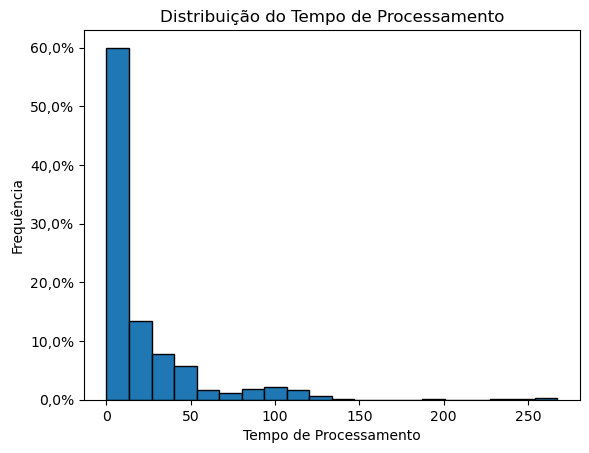

In [51]:
distribuicao_tempo_processamento(df_imagem)

#### Arquivos com tempo de processamento abaixo da média

In [18]:
media = df_imagem['Tempo de Processamento'].mean()
print("Tempo médio de processamento em milissegundos: ", media)

Tempo médio de processamento em milissegundos:  18.087248701673396


In [105]:
arquivos_abaixo_da_media(df_imagem)

,Data e Hora,Tipo de Processamento,Tempo de Processamento,Nome do Arquivo,Tamanho do Arquivo,Resultado do Processamento,Mensagem de Erro
0,2024-03-13 20:08:18,Carregamento de Imagem,29.003,10043234166_e6dd915111_n.jpg,26.068359,Sucesso,NaN
2,2024-03-13 20:08:18,Carregamento de Imagem,3.000,10200780773_c6051a7d71_n.jpg,22.774414,Sucesso,NaN
4,2024-03-13 20:08:18,Carregamento de Imagem,2.991,10294487385_92a0676c7d_m.jpg,21.147461,Sucesso,NaN
5,2024-03-13 20:08:18,Rota��o de Imagem,18.996,10294487385_92a0676c7d_m.jpg,21.147461,Sucesso,NaN
6,2024-03-13 20:08:18,Carregamento de Imagem,3.997,10437652486_aa86c14985.jpg,130.642578,Sucesso,NaN
...,...,...,...,...,...,...,...
1788,2024-03-13 20:09:09,Carregamento de Imagem,4.007,9853885425_4a82356f1d_m.jpg,17.243164,Sucesso,NaN
1790,2024-03-13 20:09:09,Carregamento de Imagem,4.999,98992760_53ed1d26a9.jpg,87.693359,Sucesso,NaN
1792,2024-03-13 20:09:09,Carregamento de Imagem,6.009,9939430464_5f5861ebab.jpg,39.317383,Sucesso,NaN
1794,2024-03-13 20:09:09,Carregamento de Imagem,3.967,9965757055_ff01b5ee6f_n.jpg,41.551758,Sucesso,NaN


#### Comparação de desempenho entre tipos de processamento

In [13]:
process_mean.sort_values()

Tipo de Processamento
Inversão Horizontal        0.000000
Carregamento de Imagem     1.831226
Rotação de Imagem         25.678716
Deslocamento de Imagem    53.300981
Zoom de Imagem            61.354000
Name: Tempo de Processamento, dtype: float64

#### Análise de correlação entre tamanho do arquivo e tempo de processamento 

In [25]:
analise_correlacao(df_imagem)

,Tamanho do Arquivo,Tempo de Processamento
Tamanho do Arquivo,1.000000,0.242122
Tempo de Processamento,0.242122,1.000000


#### Análise de frequência por tipo de processamento 

In [24]:
analise_frequencia_tipo_processamento(df_imagem)

Carregamento de Imagem    898
Rotação de Imagem         242
Deslocamento de Imagem    236
Zoom de Imagem            226
Inversão Horizontal       194
Name: Tipo de Processamento, dtype: int64

#### Análise de resultado por tipo de processamento

In [203]:
analise_resultado_por_tipo(df_imagem)

Tipo de Processamento   Resultado do Processamento
Carregamento de Imagem  Sucesso                       898
Deslocamento de Imagem  Sucesso                       196
                        Erro                           24
Invers�o Horizontal     Sucesso                       223
Rota��o de Imagem       Sucesso                       196
                        Erro                           23
Zoom de Imagem          Sucesso                       205
                        Erro                           31
Name: Resultado do Processamento, dtype: int64

#### Análise de errospor tipo de processamento

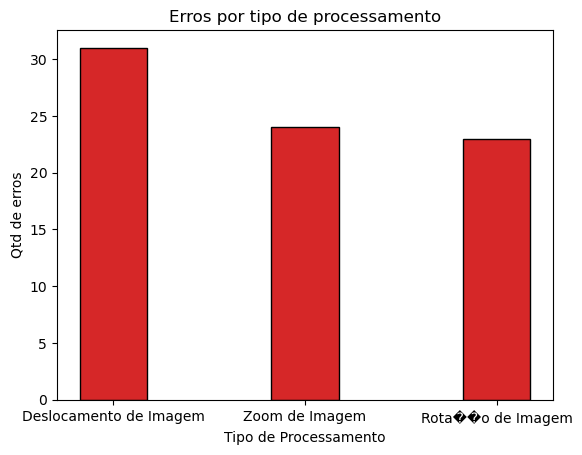

In [222]:
analise_erro_por_tipo(df_imagem)

In [279]:
analise_erro_por_hora(df_imagem,"2024-03-13")

20    78
Name: Hora, dtype: int64